# Import Libraries and Define Classes

In [1]:
import pandas as pd
import math
from collections import Counter
from graphviz import Digraph

class Node:
    def __init__(self, feature=None, value=None, label=None):
        self.feature = feature   # Feature to split on
        self.value = value       # Value of the feature to split on
        self.label = label       # Majority class label if the node is a leaf
        self.children = {}       # Dictionary to store child nodes

class ID3DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y, depth=0):
        self.root = self._build_tree(X, y, depth)

    def _calculate_entropy(self, data):
        class_counts = Counter(data)
        probabilities = [count / len(data) for count in class_counts.values()]
        entropy = -sum(p * math.log2(p) for p in probabilities)
        return entropy

    def _find_best_split(self, X, y):
      best_feature = None
      best_split_value = None
      best_info_gain = -1

      entropy_parent = self._calculate_entropy(y)

      for feature in X.columns:
        unique_values = X[feature].unique()
        for value in unique_values:
            subset_indices = X[feature] == value
            subset_y = y[subset_indices]
            entropy_child = self._calculate_entropy(subset_y)
            info_gain = entropy_parent - entropy_child

            # Create a unique identifier for the node being evaluated
            node_identifier = f"Node: {feature} = {value}"

            # Print the node identifier, entropy, and information gain
            print(f"{node_identifier}, Entropy: {entropy_child:.4f}, Info Gain: {info_gain:.4f}")

            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature
                best_split_value = value

      return best_feature, best_split_value



    def _build_tree(self, X, y, depth):
        if depth == self.max_depth:
            return Node(label=y.value_counts().idxmax())

        if len(set(y)) == 1:
            return Node(label=y.iloc[0])

        if X.empty:
            return Node(label=y.value_counts().idxmax())

        best_feature, best_split_value = self._find_best_split(X, y)
        node = Node(feature=best_feature, value=best_split_value)

        unique_values = X[best_feature].unique()
        for value in unique_values:
            subset_indices = X[best_feature] == value
            subset_X = X[subset_indices]
            subset_y = y[subset_indices]
            node.children[value] = self._build_tree(subset_X, subset_y, depth + 1)

        return node

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            node = self.root
            while node.children:
                value = row[node.feature]
                if value in node.children:
                    node = node.children[value]
                else:
                    break
            predictions.append(node.label)
        return predictions

    def visualize_tree(self, node, graph=None):
        if graph is None:
            graph = Digraph(format='png')

        if node.label is not None:
            graph.node(str(id(node)), label=node.label)
        else:
            graph.node(str(id(node)), label=node.feature)

        for value, child_node in node.children.items():
            if child_node.label is not None:
                graph.node(str(id(child_node)), label=child_node.label)
            else:
                graph.node(str(id(child_node)), label=child_node.feature)
            graph.edge(str(id(node)), str(id(child_node)), label=str(value))
            self.visualize_tree(child_node, graph)

        return graph


# Read Data and Build Decision Tree

In [2]:
# Read the CSV file into a DataFrame
dataset = pd.read_csv('/content/data1.csv')
X = dataset.drop(columns=['Status'])
y = dataset['Status']

# Initialize and fit the ID3 Decision Tree
tree = ID3DecisionTree(max_depth=3)
tree.fit(X, y)


Node: Department = Sales, Entropy: 0.9183, Info Gain: 0.0757
Node: Department = Systems, Entropy: 1.0000, Info Gain: -0.0060
Node: Department = Marketing, Entropy: 1.0000, Info Gain: -0.0060
Node: Department = Secretary, Entropy: 1.0000, Info Gain: -0.0060
Node: Age_Range = Middle-aged, Entropy: 0.9710, Info Gain: 0.0231
Node: Age_Range = Young, Entropy: -0.0000, Info Gain: 0.9940
Node: Age_Range = Senior, Entropy: -0.0000, Info Gain: 0.9940
Node: Salary_class = High, Entropy: 0.9183, Info Gain: 0.0757
Node: Salary_class = Low, Entropy: -0.0000, Info Gain: 0.9940
Node: Salary_class = Average, Entropy: 1.0000, Info Gain: -0.0060
Node: Department = Sales, Entropy: 1.0000, Info Gain: -0.0290
Node: Department = Systems, Entropy: -0.0000, Info Gain: 0.9710
Node: Department = Marketing, Entropy: 1.0000, Info Gain: -0.0290
Node: Age_Range = Middle-aged, Entropy: 0.9710, Info Gain: 0.0000
Node: Salary_class = High, Entropy: -0.0000, Info Gain: 0.9710
Node: Salary_class = Low, Entropy: -0.0000,

# Make Predictions and Visualize Tree

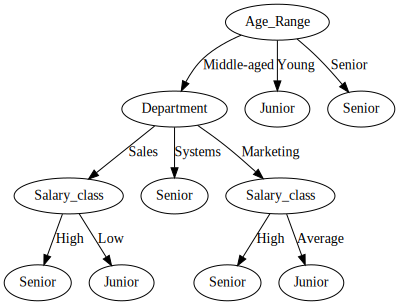

In [3]:
# Visualize the decision tree using Graphviz
tree_graph = tree.visualize_tree(tree.root)
tree_graph

In [4]:
# Predict the class labels for a new sample
new_sample = pd.DataFrame({'Department': 'Sales','Age_Range': 'Middle-aged','Salary_class': 'Low'}, index=[0])
predictions = tree.predict(new_sample)
print(predictions)


['Junior']
